# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
android_data = pd.read_csv('./data/Google-Playstore.csv')
android_data.shape

(2312944, 24)

In [3]:
android_data

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [3]:
ios_data = pd.read_csv('./data/appleAppData.csv')
ios_data.shape 

(1230376, 21)

## Data Wrangling

### Rename columns

In [4]:
def rename_columns(data):
    data.rename(lambda x: x.lower().strip().replace(' ', '_'), 
            axis='columns', inplace=True)

In [5]:
rename_columns(android_data)
android_data.columns

Index(['app_name', 'app_id', 'category', 'rating', 'rating_count', 'installs',
       'minimum_installs', 'maximum_installs', 'free', 'price', 'currency',
       'size', 'minimum_android', 'developer_id', 'developer_website',
       'developer_email', 'released', 'last_updated', 'content_rating',
       'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice',
       'scraped_time'],
      dtype='object')

In [6]:
rename_columns(ios_data)
ios_data.columns

Index(['app_id', 'app_name', 'appstore_url', 'primary_genre', 'content_rating',
       'size_bytes', 'required_ios_version', 'released', 'updated', 'version',
       'price', 'currency', 'free', 'developerid', 'developer',
       'developer_url', 'developer_website', 'average_user_rating', 'reviews',
       'current_version_score', 'current_version_reviews'],
      dtype='object')

### Drop unnecessary columns

In [7]:
android_columns_to_drop = [
    'app_id', 'minimum_installs', 'maximum_installs', 'size', 'minimum_android', 'developer_id', 'developer_website', 'developer_email', 
    'released', 'last_updated', 'content_rating', 'privacy_policy', 'editors_choice', 'scraped_time'
]
android_data.drop(android_columns_to_drop, axis='columns', inplace=True)
android_data.head()

,app_name,category,rating,rating_count,installs,free,price,currency,ad_supported,in_app_purchases
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,USD,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,USD,True,False
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,USD,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,True,0.0,USD,True,False
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,USD,False,False


In [8]:
ios_columns_to_drop = [
    'app_id', 'appstore_url', 'size_bytes', 'required_ios_version', 'released', 'updated', 'version', 'developerid', 'developer',
    'developer_url', 'developer_website', 'current_version_score', 'current_version_reviews', 'content_rating'
]

ios_data.drop(ios_columns_to_drop, axis='columns', inplace=True)
ios_data.head()

,app_name,primary_genre,price,currency,free,average_user_rating,reviews
0,A+ Paper Guide,Education,0.00,USD,True,0.0,0
1,A-Books,Book,0.00,USD,True,5.0,1
2,A-books,Book,0.00,USD,True,0.0,0
3,A-F Book #1,Book,2.99,USD,False,0.0,0
4,A-Z Synonyms Dictionary,Reference,0.00,USD,True,0.0,0


### Subset only for the top 10 categories

In [9]:
def get_top_categories(data, n_top, category_label):
    value_counts = data[category_label].value_counts()
    df_value_counts = pd.DataFrame(value_counts).reset_index()
    df_value_counts.columns = ['category', 'count']
    top_list = df_value_counts.category[:n_top].tolist()
    return data[data[category_label].isin(top_list)].reset_index(drop=True)

In [10]:
top_android = get_top_categories(data=android_data, n_top=10, category_label='category')
top_android.shape

(1309508, 10)

In [11]:
top_ios = get_top_categories(data=ios_data, n_top=10, category_label='primary_genre')
top_ios.shape

(915787, 7)

## Exploration

### Basic Exploration

In [12]:
android_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   app_name          object 
 1   category          object 
 2   rating            float64
 3   rating_count      float64
 4   installs          object 
 5   free              bool   
 6   price             float64
 7   currency          object 
 8   ad_supported      bool   
 9   in_app_purchases  bool   
dtypes: bool(3), float64(3), object(4)
memory usage: 130.1+ MB


In [13]:
ios_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   app_name             1230375 non-null  object 
 1   primary_genre        1230376 non-null  object 
 2   price                1229886 non-null  float64
 3   currency             1230376 non-null  object 
 4   free                 1230376 non-null  bool   
 5   average_user_rating  1230376 non-null  float64
 6   reviews              1230376 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 57.5+ MB


In [14]:
with pd.option_context('float_format', '{:f}'.format):
    print(android_data.describe())

              rating     rating_count          price
count 2290061.000000   2290061.000000 2312944.000000
mean        2.203152      2864.838877       0.103499
std         2.106223    212162.571037       2.633127
min         0.000000         0.000000       0.000000
25%         0.000000         0.000000       0.000000
50%         2.900000         6.000000       0.000000
75%         4.300000        42.000000       0.000000
max         5.000000 138557570.000000     400.000000


In [15]:
with pd.option_context('float_format', '{:f}'.format):
    print(ios_data.describe())

               price  average_user_rating         reviews
count 1229886.000000       1230376.000000  1230376.000000
mean        0.504126             1.788387      825.947792
std         6.869674             2.154105    50160.512897
min         0.000000             0.000000        0.000000
25%         0.000000             0.000000        0.000000
50%         0.000000             0.000000        0.000000
75%         0.000000             4.333330        3.000000
max       999.990000             5.000000 22685334.000000


The mean price is not representative because there are too free apps. For get the real mean price is better use only paid apps.

### App Ratings

In [16]:
def hist_ratings(data, title):
    _, axis = plt.subplots()

    # Plot a histogram
    axis.hist(data, bins=20)
    # Label
    axis.set(title=title,
        xlabel='Rating out of 5.0',
        ylabel='Count')
    plt.show();

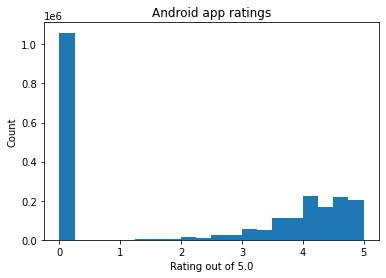

In [17]:
hist_ratings(data=android_data['rating'], title='Android app ratings')

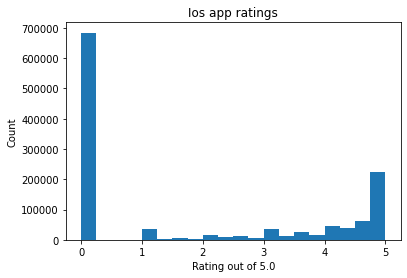

In [18]:
hist_ratings(data=ios_data['average_user_rating'], title='Ios app ratings')

In [19]:
def hist_ratings_over_0(dataset, rating_label, title):
    _, axis = plt.subplots()

    # Subset for ratings over 0
    over_0 = dataset[dataset[rating_label] > 0][rating_label]

    # Plot a histogram
    axis.hist(over_0, bins=15)
    # Label
    axis.set(title=title,
        xlabel='Rating out of 5.0',
        ylabel='Count')
    plt.show();

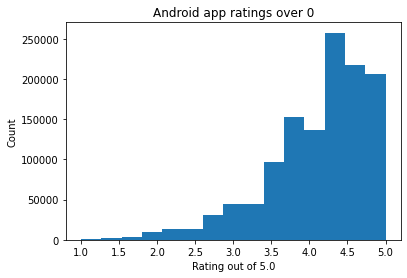

In [20]:
hist_ratings_over_0(dataset=android_data,rating_label='rating', title='Android app ratings over 0')

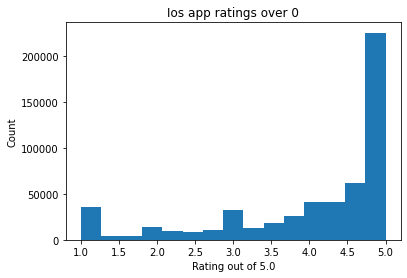

In [21]:
hist_ratings_over_0(dataset=ios_data,rating_label='average_user_rating', title='Ios app ratings over 0')

### Categories

In [22]:
def bar_categories(data, title):
    _, axis = plt.subplots()

    # Plot a normalized countplot
    data.value_counts(normalize=True).plot.barh()
    # Label
    axis.set(title=title,
       xlabel='Proportion', ylabel='')
    plt.show();

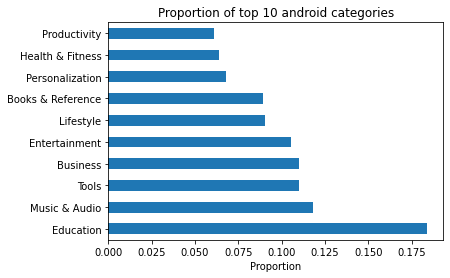

In [23]:
bar_categories(data=top_android['category'], title='Proportion of top 10 android categories')

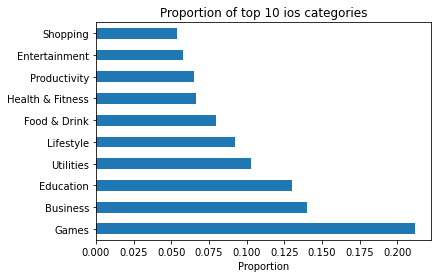

In [24]:
bar_categories(data=top_ios['primary_genre'], title='Proportion of top 10 ios categories')

### Price

In [25]:
def percentage_paid_apps(data):
    return round((len(data[data['free'] == False]) / len(data))*100,2)

In [26]:
print('Percentage of paid apps in android:', percentage_paid_apps(android_data), "%")
print('Percentage of paid apps in ios:', percentage_paid_apps(ios_data), "%")

Percentage of paid apps in android: 1.95 %
Percentage of paid apps in ios: 8.37 %


In [27]:
with pd.option_context('float_format', '{:f}'.format):
    print(android_data[android_data['free'] == False]['price'].describe())

count   45068.000000
mean        5.311701
std        18.115487
min         0.000000
25%         0.990000
50%         1.990000
75%         4.490000
max       400.000000
Name: price, dtype: float64


In [28]:
with pd.option_context('float_format', '{:f}'.format):
    print(ios_data[ios_data['free'] == False]['price'].describe())

count   102502.000000
mean         6.048838
std         23.080538
min          0.990000
25%          0.990000
50%          1.990000
75%          4.990000
max        999.990000
Name: price, dtype: float64


In [29]:
def bar_paid_proportion(data, title):
    _, axis = plt.subplots()

    # Plot a normalized countplot
    data.value_counts(normalize=True).plot.barh()

    # Label
    axis.set(title=title,
        xlabel='Proportion', ylabel='', yticklabels=["Free", "Paid"])

    plt.show()

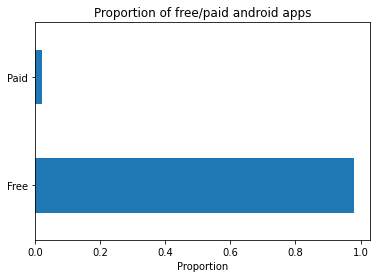

In [30]:
bar_paid_proportion(data = android_data['free'], title='Proportion of free/paid android apps')

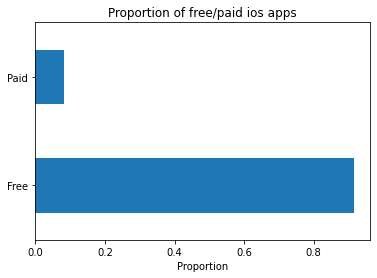

In [31]:
bar_paid_proportion(data = ios_data['free'], title='Proportion of free/paid ios apps')